# Retail sales data analysis

## Import necessary module

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [4]:
df=pd.read_csv("retail_sales.csv")

## Data Exploration

In [5]:
df.head()

,Retailer Name,Retailer ID,Invoice Date,Region,State,District,Product,Price per Unit (INR),Units Sold,Total Sales (INR),...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,Prime Step Store,95425,6/9/2018,South,Karnataka,Bengaluru,Sneakers,2260,57,128820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Best Path Emporium,40826,12/22/2018,North,Punjab,Jalandhar,Sandals,4792,33,158136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Prime Walk Boutique,83635,6/12/2022,North,Punjab,Amritsar,Heels,3795,65,246675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Top Footwear Co,33817,3/22/2019,South,Karnataka,Hubli,Heels,1462,93,135966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fresh Style Boutique,48028,8/14/2019,East,West Bengal,Howrah,Sneakers,4034,26,104884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Retailer Name           5000 non-null   object 
 1   Retailer ID             5000 non-null   int64  
 2   Invoice Date            5000 non-null   object 
 3   Region                  5000 non-null   object 
 4   State                   5000 non-null   object 
 5   District                5000 non-null   object 
 6   Product                 5000 non-null   object 
 7   Price per Unit (INR)    5000 non-null   int64  
 8   Units Sold              5000 non-null   int64  
 9   Total Sales (INR)       5000 non-null   int64  
 10  Operating Profit (INR)  5000 non-null   float64
 11  Sales Method            5000 non-null   object 
 12  Unnamed: 12             0 non-null      float64
 13  Unnamed: 13             0 non-null      float64
 14  Unnamed: 14             0 non-null      

### Remove Unused columns

In [9]:
df = df.dropna(axis=1, how='all')

In [10]:
df.describe

<bound method NDFrame.describe of                Retailer Name  Retailer ID Invoice Date Region        State  \
0           Prime Step Store        95425     6/9/2018  South    Karnataka   
1         Best Path Emporium        40826   12/22/2018  North       Punjab   
2        Prime Walk Boutique        83635    6/12/2022  North       Punjab   
3            Top Footwear Co        33817    3/22/2019  South    Karnataka   
4       Fresh Style Boutique        48028    8/14/2019   East  West Bengal   
...                      ...          ...          ...    ...          ...   
4995        Great Step Place        42978     2/3/2021  North       Punjab   
4996   Prime Fashion Company        71405    2/21/2018  North       Punjab   
4997         Urban Path Mart        62341    2/24/2019   East  West Bengal   
4998  Reliable Walk Boutique        25626    8/24/2023  South    Karnataka   
4999   Quality Shoe Boutique        73363    7/31/2021  North       Punjab   

       District   Product  Pr

## Clean Data

In [12]:
df.isna().sum()

Retailer Name             0
Retailer ID               0
Invoice Date              0
Region                    0
State                     0
District                  0
Product                   0
Price per Unit (INR)      0
Units Sold                0
Total Sales (INR)         0
Operating Profit (INR)    0
Sales Method              0
dtype: int64

Sorry, but there are no NA value in that dataset

### Try to find outlier (With Generative IA)

There is no column where Outlier could be possible. So the test a code found on Gemini to calculate outler the INR column. 

In [17]:
Q1 = df['Operating Profit (INR)'].quantile(0.25)
Q3 = df['Operating Profit (INR)'].quantile(0.75)
IQR = Q3 - Q1

# Limites inférieures et supérieures
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification des outliers
outliers = df[(df['Operating Profit (INR)'] < lower_bound) | (df['Operating Profit (INR)'] > upper_bound)]

print(outliers.shape[0])

166


In that column there is 166 outliers, but we can't confirm that there are really outlier

## Data visualisation (with generative IA)

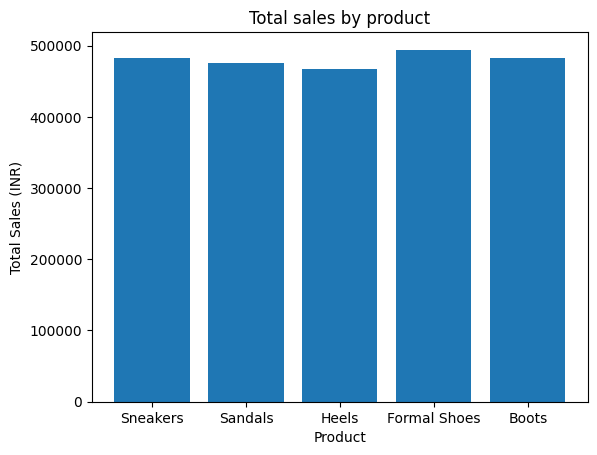

In [19]:
plt.bar(df['Product'], df['Total Sales (INR)'])
plt.xlabel('Product')
plt.ylabel('Total Sales (INR)')
plt.title('Total sales by product')
plt.show()

C:\Users\bredech\AppData\Local\Temp\1\ipykernel_23832\4115459730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Invoice Date2'] = pd.to_datetime(df['Invoice Date'], format='%m/%d/%Y')
C:\Users\bredech\AppData\Local\Temp\1\ipykernel_23832\4115459730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['invoice_year'] = df['Invoice Date2'].dt.year  # Extraire le mois de la date


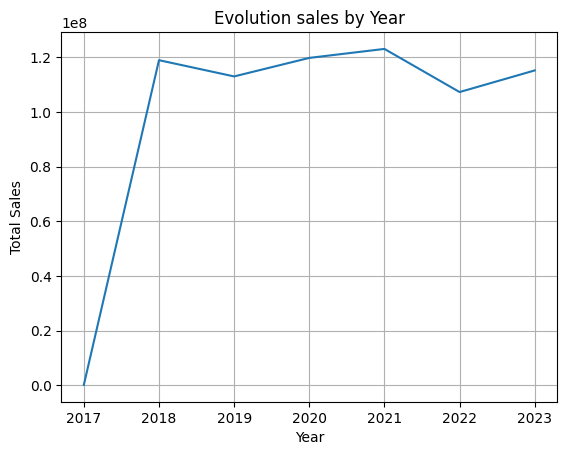

In [24]:
df['Invoice Date2'] = pd.to_datetime(df['Invoice Date'], format='%m/%d/%Y')
df['invoice_year'] = df['Invoice Date2'].dt.year  # Extraire le mois de la date
sales_by_year = df.groupby('invoice_year')['Total Sales (INR)'].sum()

plt.plot(sales_by_month.index, sales_by_month.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Evolution sales by Year')
#plt.xticks(ventes_par_mois.index, ['Jan', 'Fév', 'Mar', ...])  # Personnaliser les labels des mois
plt.grid(True)
plt.show()